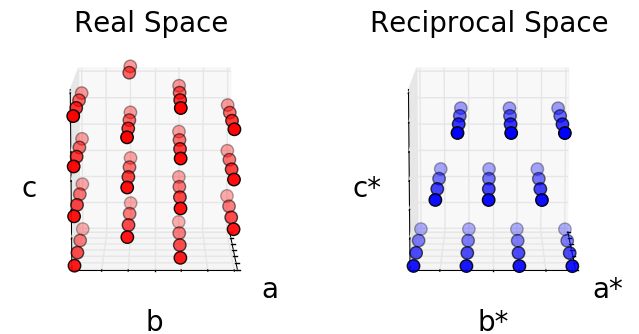

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.widgets import Slider, Button, RadioButtons
from mpl_toolkits.mplot3d import Axes3D
from traitlets import CInt, link

a = 1.0
b = 1.0
c = 1.0

alpha = 90.0
beta = 90.0
gamma = 90.0

def RS(a,b,c,alpha,beta,gamma):
    alpha = alpha/360.*2.*np.pi
    beta = beta/360.*2.*np.pi
    gamma = gamma/360.*2.*np.pi
    
    v = np.sqrt(1 - np.cos(alpha)**2 - np.cos(beta)**2 - np.cos(gamma)**2 + 2*cos(alpha)*np.cos(beta)*np.cos(gamma))
    ar = [a, b*np.cos(gamma), c*np.cos(beta)]
    br = [0.0, b*np.sin(gamma), c*(np.cos(alpha)-np.cos(beta)*np.cos(gamma)) / np.sin(gamma)]
    cr = [0.0, 0.0, c*v/np.sin(gamma)]
    
    V = np.dot(ar,np.cross(br,cr))
    af = np.cross(br,cr)/V
    bf = np.cross(cr,ar)/V
    cf = np.cross(ar,br)/V
    
    width = 10
    M = []
    for i in range(-width, width):
        for j in range(-width, width):
            for k in range(-width, width):
                temp = i*af + j*bf + k*cf
                M.append(temp)
    
    M = np.array(M)
    
    for i in np.arange(len(M)):
        if np.any(M[i,:] < -0.1):
            M[i,:] = [NaN, NaN, NaN]
        elif np.any(M[i,:] > 3.1):
            M[i,:] = [NaN, NaN, NaN]
        else:
            pass
     
    ar = np.array(ar)
    br = np.array(br)
    cr = np.array(cr)      
    R = []
    for i in range(-width, width):
        for j in range(-width, width):
            for k in range(-width, width):
                temp = i*ar + j*br + k*cr
                R.append(temp)
    
    R = np.array(R)
    
    for i in np.arange(len(R)):
        if np.any(R[i,:] < -0.1):
            R[i,:] = [NaN, NaN, NaN]
        elif np.any(R[i,:] > 3.1):
            R[i,:] = [NaN, NaN, NaN]
        else:
            pass
        
    return M, R


sa = FloatSlider(description='a', min=0.5, max=2.0, value=a)
sb = FloatSlider(description='b', min=0.5, max=2.0, value=b)
sc = FloatSlider(description='c', min=0.5, max=2.0, value=c)

salpha = FloatSlider(description=''r'$\alpha$', min=45.0, max=120.0, value=alpha)
sbeta = FloatSlider(description=''r'$\beta$', min=45.0, max=120.0, value=beta)
sgamma = FloatSlider(description=''r'$\gamma$', min=45.0, max=120.0, value=gamma)

def MR(a,b,c,alpha,beta,gamma):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax2 = fig.add_subplot(1, 2, 1, projection='3d')
    ax.view_init(elev=10., azim=0)
    ax2.view_init(elev=10., azim=0)

    M, R = RS(a,b,c,alpha,beta,gamma)
    l = ax.scatter(M[:,0],M[:,1],M[:,2], s=80,c='b')
    m = ax2.scatter(R[:,0],R[:,1],R[:,2], s=80, c='r')

    ax.set_xlim3d(0, 3)
    ax.set_ylim3d(0, 3)
    ax.set_zlim3d(0, 3)

    plt.setp( ax.get_xticklabels(), visible=False)
    plt.setp( ax.get_yticklabels(), visible=False)
    plt.setp( ax.get_zticklabels(), visible=False)
    ax.set_xlabel('a*', fontsize=20)
    ax.set_ylabel('b*', fontsize=20)
    ax.set_zlabel('c*', fontsize=20)
    ax.set_title('Reciprocal Space',fontsize=20)
    ax2.set_xlim3d(0, 3)
    ax2.set_ylim3d(0, 3)
    ax2.set_zlim3d(0, 3)
    plt.setp( ax2.get_xticklabels(), visible=False)
    plt.setp( ax2.get_yticklabels(), visible=False)
    plt.setp( ax2.get_zticklabels(), visible=False)
    ax2.set_xlabel('a', fontsize=20)
    ax2.set_ylabel('b', fontsize=20)
    ax2.set_zlabel('c', fontsize=20)
    ax2.set_title('Real Space',fontsize=20)
afloat = FloatText(value=a, description='a')
bfloat = FloatText(value=b, description='c')
cfloat = FloatText(value=c, description='b')
alink = link((afloat, 'value'), (sa, 'value'))
blink = link((bfloat, 'value'), (sb, 'value'))
clink = link((cfloat, 'value'), (sc, 'value'))
interact(MR,a=sa,b=sb,c=sc,alpha=salpha,beta=sbeta,gamma=sgamma) 
display(afloat)
display(bfloat)
display(cfloat)


